In [1]:
from pycaret.datasets import get_data
boston = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
boston.shape

(506, 14)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test = train_test_split(boston, test_size=0.2)

In [2]:
from pycaret.regression import *

In [19]:
exp_name = setup(data = X_train,  target = 'medv')

,Description,Value
0,Session id,8437
1,Target,medv
2,Target type,Regression
3,Original data shape,"(404, 14)"
4,Transformed data shape,"(404, 14)"
5,Transformed train set shape,"(282, 14)"
6,Transformed test set shape,"(122, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


## 모델 정보 확인하기 

In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 모델 생성하기

In [21]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3491,9.7509,3.1226,0.8833,0.1167,0.1025
1,3.4581,20.8987,4.5715,0.7279,0.2090,0.2199
2,3.8382,30.6326,5.5347,0.6722,0.1993,0.1649
3,2.8198,13.9813,3.7392,0.7336,0.2328,0.1340
4,3.2327,16.2589,4.0322,0.7977,0.2241,0.2025
5,3.0209,22.4332,4.7364,0.6874,0.2310,0.1365
6,3.6030,35.1510,5.9288,0.5993,0.2168,0.1512
7,3.3428,17.2393,4.1520,0.8377,0.3213,0.2265
8,3.2238,16.9714,4.1196,0.7506,0.2143,0.1880


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
pred_holdout = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.7789,28.4268,5.3317,0.7166,0.4484,0.1951


In [34]:
pred_unseen = predict_model(lr, data = X_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.4971,31.1223,5.5787,0.6137,0.2039,0.1554


## 모델 평가 

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

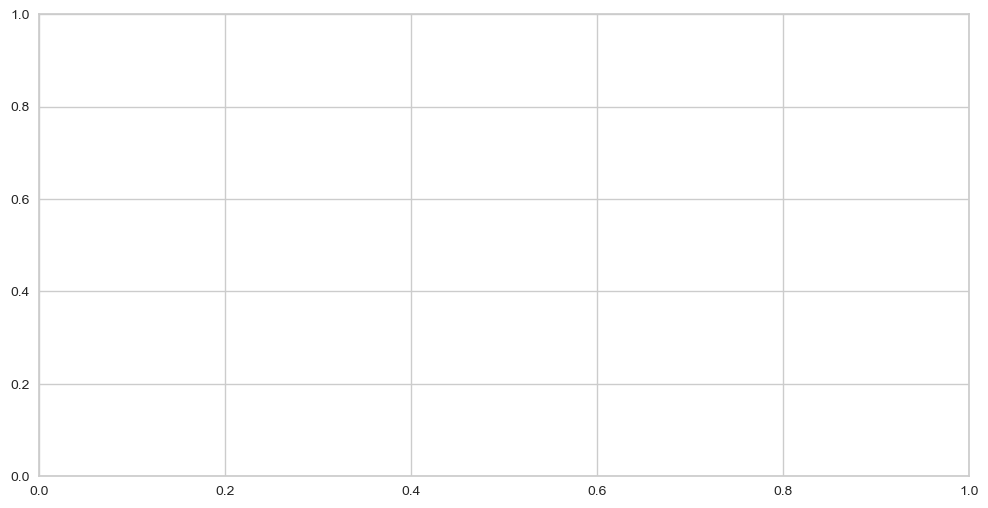

In [24]:
evaluate_model(lr)

## 최고 모델 확인하기

In [25]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1269,10.6832,3.1030,0.8606,0.1411,0.1061,0.1830
catboost,CatBoost Regressor,2.0878,10.7654,3.1360,0.8604,0.1446,0.1060,0.3720
xgboost,Extreme Gradient Boosting,2.2294,11.0468,3.2033,0.8543,0.1478,0.1109,0.1800
gbr,Gradient Boosting Regressor,2.1547,11.3519,3.1858,0.8534,0.1470,0.1106,0.1790
rf,Random Forest Regressor,2.2928,12.9152,3.4110,0.8333,0.1519,0.1152,0.1850
lightgbm,Light Gradient Boosting Machine,2.4334,13.2745,3.5093,0.8239,0.1522,0.1202,0.2250
ada,AdaBoost Regressor,2.7450,16.0128,3.8337,0.7948,0.1792,0.1475,0.1800
lr,Linear Regression,3.1027,19.0946,4.2699,0.7530,0.2107,0.1623,0.1580
ridge,Ridge Regression,3.0971,19.1153,4.2689,0.7530,0.2149,0.1630,0.1570
br,Bayesian Ridge,3.1206,19.4236,4.2953,0.7501,0.2192,0.1640,0.1620


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
best_model

ExtraTreesRegressor(n_jobs=-1, random_state=8437)

In [27]:
best_modes = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1269,10.6832,3.1030,0.8606,0.1411,0.1061,0.1780
catboost,CatBoost Regressor,2.0878,10.7654,3.1360,0.8604,0.1446,0.1060,0.1660
xgboost,Extreme Gradient Boosting,2.2294,11.0468,3.2033,0.8543,0.1478,0.1109,0.1710
gbr,Gradient Boosting Regressor,2.1547,11.3519,3.1858,0.8534,0.1470,0.1106,0.1710
rf,Random Forest Regressor,2.2928,12.9152,3.4110,0.8333,0.1519,0.1152,0.1720
lightgbm,Light Gradient Boosting Machine,2.4334,13.2745,3.5093,0.8239,0.1522,0.1202,0.1650
ada,AdaBoost Regressor,2.7450,16.0128,3.8337,0.7948,0.1792,0.1475,0.1690
lr,Linear Regression,3.1027,19.0946,4.2699,0.7530,0.2107,0.1623,0.1650
ridge,Ridge Regression,3.0971,19.1153,4.2689,0.7530,0.2149,0.1630,0.1620
br,Bayesian Ridge,3.1206,19.4236,4.2953,0.7501,0.2192,0.1640,0.1640


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [28]:
best_modes

[ExtraTreesRegressor(n_jobs=-1, random_state=8437),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=8437, ...),
 GradientBoostingRegressor(random_state=8437),
 RandomForestRegressor(n_jobs=-1, random_state=8437)]

In [29]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0760,6.1445,2.4788,0.9264,0.1322,0.1133
1,2.0136,5.8282,2.4142,0.9241,0.1346,0.1109
2,2.8723,26.8311,5.1799,0.7129,0.2015,0.1148
3,1.9798,10.1743,3.1897,0.8061,0.1304,0.0867
4,2.6252,14.1466,3.7612,0.8240,0.1641,0.1344
5,2.5561,12.1981,3.4926,0.8300,0.1546,0.1261
6,2.2460,13.9216,3.7312,0.8413,0.1179,0.0903
7,1.6308,4.3058,2.0750,0.9595,0.1373,0.1040
8,2.4655,11.6215,3.4090,0.8293,0.1845,0.1463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

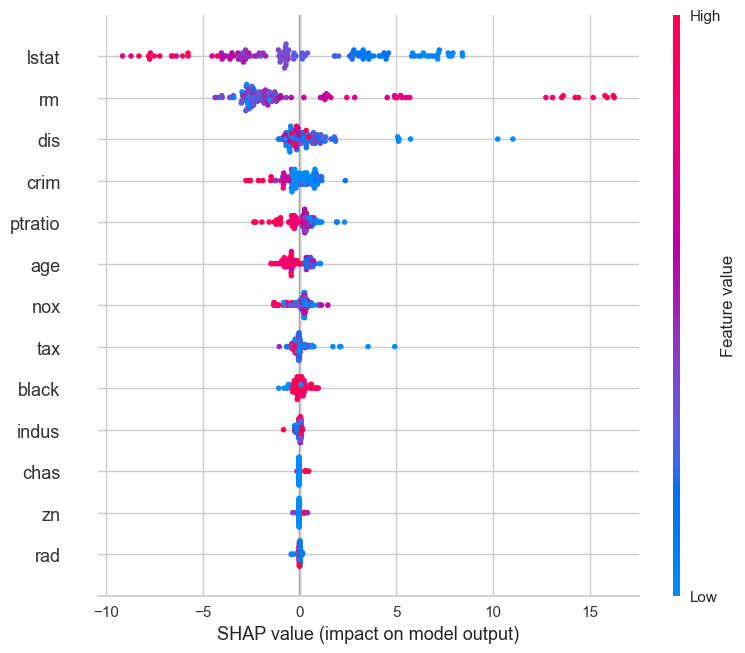

In [30]:
interpret_model(xgboost)

In [ ]:
top3 = compare_models(n_select = 3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:49:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Least Angle Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3.1027,19.0946,4.2699,0.7530,0.2107,0.1623,0.1640
ridge,Ridge Regression,3.0971,19.1153,4.2689,0.7530,0.2149,0.1630,0.1630
en,Elastic Net,3.4469,23.4317,4.7329,0.7006,0.2224,0.1715,0.1680
lasso,Lasso Regression,3.5311,24.5470,4.8470,0.6869,0.2243,0.1747,0.1620
lar,Least Angle Regression,3.5702,24.2482,4.8413,0.6811,0.2546,0.1881,0.1650


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
tuned_top3 = [tune_model(i) for i in top3]

In [ ]:
blender = blend_models(tuned_top3)


In [ ]:
stacker = stack_models(tuned_top3)

In [ ]:
best_mae_model = automl(optimize = 'MAE')